In [3]:
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import keras_to_numpy as ktnp
import pickle
import cddm_data_simulation as cds
import boundary_functions as bf
import numpy as np

In [4]:
my_dir = '/users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm/keras_models/dnnregressor_ddm_03_29_20_17_38_58/'

In [5]:
biases = pickle.load(open(my_dir + 'biases.pickle', 'rb'))
weights = pickle.load(open(my_dir + 'weights.pickle', 'rb'))
activations = pickle.load(open(my_dir + 'activations.pickle', 'rb'))

In [8]:
# %%timeit -n 1 -r 100

# Make dataset
out = cds.ddm_flexbound(n_samples = 1024,
                        boundary_fun = bf.constant,
                        boundary_multiplicative = True,
                        a = 2)
out = np.concatenate([out[0], out[1]], axis = 1)

In [9]:
params_rep = [0, 1, 0.5, 0.]
keras_input_batch = np.zeros((out.shape[0], 6))
keras_input_batch[:, :4] = params_rep
keras_input_batch[:, 4:] = out

In [10]:
def mlp_target(params, data, ll_min = -16.11809):
    mlp_input_batch = np.zeros((data.shape[0], 6))
    mlp_input_batch[:, :4] = params
    mlp_input_batch[:, 4:] = data
    out = np.maximum(ktnp.predict(mlp_input_batch, weights, biases, activations, n_layers = 4), ll_min)
    return np.sum(out)

In [11]:
class mlp_target_class:
    def __init__(self, 
                 data = [],
                 weights = [],
                 biases = [],
                 activations = [],
                 ll_min = -16.11809,
                 n_params = 4):
        
        self.n_params = n_params
        self.data = data
        self.ll_min = ll_min
        self.batch = np.zeros((self.data.shape[0], n_params + 2))
        self.batch[:, self.n_params:] = data
        self.weights = weights
        self.biases = biases
        self.activations = activations
        
    
    def target(self, 
               params):
        self.batch[:, :self.n_params] = np.tile(params, (self.data.shape[0], 1))
        return np.sum(np.maximum(ktnp.predict(self.batch, self.weights, self.biases, self.activations, n_layers = 4), self.ll_min))
    
mlp = mlp_target_class(data = out,
                       weights = weights,
                       biases = biases,
                       activations = activations)

In [12]:
%%timeit -n 1 -r 100 
mlp_target(params_rep, out)

The slowest run took 4.50 times longer than the fastest. This could mean that an intermediate result is being cached.
4.68 ms ± 1.5 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


In [15]:
%%timeit -n 1 -r 100
mlp.target(params_rep)

4.93 ms ± 915 µs per loop (mean ± std. dev. of 100 runs, 1 loop each)


In [27]:
model = keras.models.load_model(my_dir + 'model_final.h5' )

In [31]:
%%timeit -n 1 -r 100

model.predict(keras_input_batch)

61.7 ms ± 5.95 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = tf.train.AdamOptimizer(0.001),
              loss = 'mse',
              metrics = ['mse']

In [2]:
import numpy as np

data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

val_data = np.random.random((100, 32))
val_labels = np.random.random((100, 10))

model.fit(data, labels, epochs = 10, 
          batch_size = 32,
          validation_data = (val_data, val_labels))

NameError: name 'model' is not defined

In [ ]:
model.evaluate(val_data, val_labels, batch_size = 50)

In [ ]:
model.evaluate(data, labels, batch_size = 50)

In [ ]:
model.save_weights(filepath = my_dir + 'test1', save_format = 'tf')

In [ ]:
model.load_weights(my_dir + 'test1')

In [ ]:
model.save(filepath = my_dir + 'test_full')

In [ ]:
model  =  keras.models.load_model(my_dir + 'test_full')

In [ ]:
model.compile(optimizer = tf.train.AdamOptimizer(0.001),
              loss = 'mse',
              metrics = ['mse'])

In [ ]:
model.get_weights()

In [6]:
#### Let's try with what I have
import make_data_wfpt as mdw

data, _, __ = mdw.make_data_choice_probabilities(w_range = [0.5, 0.5], n_samples = 20000, write_to_file = False)

datapoint 0 generated
datapoint 1000 generated
datapoint 2000 generated
datapoint 3000 generated
datapoint 4000 generated
datapoint 5000 generated
datapoint 6000 generated
datapoint 7000 generated
datapoint 8000 generated
datapoint 9000 generated
datapoint 10000 generated
datapoint 11000 generated
datapoint 12000 generated
datapoint 13000 generated
datapoint 14000 generated
datapoint 15000 generated
datapoint 16000 generated
datapoint 17000 generated
datapoint 18000 generated
datapoint 19000 generated


In [18]:
train_f, train_l, test_f, test_l = mdw.train_test_split_choice_probabilities(data = data, 
                                                                             write_to_file = False, 
                                                                             p_train = 0.5,
                                                                             from_file = False,
                                                                             backend = 'keras')

In [24]:
test_l

matrix([[6.97324307e-01],
        [1.91735046e-01],
        [9.82050363e-01],
        ...,
        [9.90762653e-01],
        [3.31784413e-02],
        [1.75328882e-04]])

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = tf.train.AdamOptimizer(0.001),
              loss = 'mse',
              metrics = ['mse'])

In [9]:
model.fit(train_f, train_l, epochs = 100, 
          batch_size = 100)
          #validation_data = (val_data, val_labels))



Epoch 1/100
20000/20000 [==============================] - 1s 33us/step - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 2/100
20000/20000 [==============================] - 0s 17us/step - loss: 3.5339e-04 - mean_squared_error: 3.5339e-04
Epoch 3/100
20000/20000 [==============================] - 0s 16us/step - loss: 8.1693e-05 - mean_squared_error: 8.1693e-05
Epoch 4/100
20000/20000 [==============================] - 0s 17us/step - loss: 4.6798e-05 - mean_squared_error: 4.6798e-05
Epoch 5/100
20000/20000 [==============================] - 0s 18us/step - loss: 3.5434e-05 - mean_squared_error: 3.5434e-05
Epoch 6/100
20000/20000 [==============================] - 0s 17us/step - loss: 2.5602e-05 - mean_squared_error: 2.5602e-05
Epoch 7/100
20000/20000 [==============================] - 0s 19us/step - loss: 2.1532e-05 - mean_squared_error: 2.1532e-05
Epoch 8/100
20000/20000 [==============================] - 0s 18us/step - loss: 1.7687e-05 - mean_squared_error: 1.7687e-05
Epoch 9/100
2000

In [ ]:
my_predictions = model.predict(train_f, batch_size = 50)

In [ ]:
my_predictions

In [ ]:
generated_data = data['p_lower_barrier']

In [ ]:
data['p_lower_barrier_predicted'] = my_predictions

In [ ]:
def make_keras_model(hidden_layers = [1,1,1], 
                     hidden_activations = ['relu', 'relu', 'relu'],
                     output_layer = 1,
                     output_activation = 'sigmoid'
                     model_directory = ''):
    
    assert len(hidden_layers) == len(hidden_activation) or len(hidden_activations) == 1, 'Check that your layers and activations are of the correct dimensions'
    if len(hidden_activations) == 1 and len(hidden_layers) > 1:
        tmp  = hidden_activations[0]
        for _ in range(0, len(hidden_layers) - 1, 1):
            hidden_activations.append(tmp)
    
    # Defining the model
    model = keras.Sequential()
    
    # Hidden Layers
    for cnt in range(0, len(layers), 1):
        model.add(keras.layers.Dense(layers[cnt], activation = activations[cnt]))
    
    # Output Layer
    model.add(keras.layers.Dense(output_layer, activation = output_activation))
    
    
    
    
    
    model.compile(optimizer = keras.,
                  loss = 'mse',
                  metrics = ['mse'])

In [13]:
params = {
          'data_type': 'choice_probabilities',
          'input_shape': 3,
          'output_shape': 1,
          'output_activation': 'sigmoid',
          'hidden_layers': [20, 20, 20],
          'hidden_activations': ['relu', 'relu', 'relu'], 
          'l1_activation': [0.0, 0.0, 0.0], 
          'l2_activation': [0.0, 0.0, 0.0],
          'l1_kernel': [0.0, 0.0, 0.0, 0.0],
          'l2_kernel': [0.0, 0.0, 0.0, 0.0],
          'optimizer': 'Nadam',
          'loss': 'mse',
          'metrics': ['mse'],
          'batch_size': 100,
          'max_epoch': 1000,
          'eval_after_n_epochs': 10,
          'model_directory': '',
          'training_data_size': 'online'
          }

def keras_model_fun(params):
    
    # This returns a tensor
    inputs = keras.layers.Input(shape = (params['input_shape'], ))
    
    # Model hidden
    op = keras.layers.Dense(params['hidden_layers'][0], 
                            activation = params['hidden_activations'][0],
                            kernel_regularizer = keras.regularizers.l1_l2(l1 = params['l1_kernel'][0], 
                                                                          l2 = params['l2_kernel'][0]),
                            activity_regularizer = keras.regularizers.l1_l2(l1 = params['l1_activation'][0], 
                                                                            l2 = params['l2_activation'][0])
                           )(inputs)
    
    for cnt in range(1, len(params['hidden_layers']), 1):
        op = keras.layers.Dense(params['hidden_layers'][cnt], 
                                activation = params['hidden_activations'][cnt],
                                kernel_regularizer = keras.regularizers.l1_l2(l1 = params['l1_kernel'][cnt], 
                                                                          l2 = params['l2_kernel'][cnt]),
                                activity_regularizer = keras.regularizers.l1_l2(l1 = params['l1_activation'][cnt], 
                                                                            l2 = params['l2_activation'][cnt]))(op)
    
    # Model output 
    outputs = keras.layers.Dense(params['output_shape'], params['output_activation'])(op)
    
    return keras.models.Model(inputs = inputs, outputs = outputs)

In [56]:
my_model = keras_model_fun(params)

In [57]:
my_model.compile(optimizer = params['optimizer'],
                 loss = params['loss'],
                 metrics = params['metrics'])

In [58]:
history = my_model.fit(x = train_f, 
                       y = train_l,
                       epochs = 100, 
                       batch_size = 100,
                       validation_data = (test_f, test_l),
                       callbacks = [keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
                                                                      factor = 0.1, 
                                                                      patience = 10, 
                                                                      min_lr = 1e-5),
                                    keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100),
                                    keras.callbacks.ModelCheckpoint(filepath = my_dir + 'train_with_callbacks/ckpt',
                                                                    save_best_only = True,
                                                                    save_weights_only = True,
                                                                    period = 10)
                                   ]
                       )

Train on 9991 samples, validate on 10009 samples
Epoch 1/100
9991/9991 [==============================] - 1s 141us/step - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2/100
9991/9991 [==============================] - 0s 31us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 6.0047e-04 - val_mean_squared_error: 6.0047e-04
Epoch 3/100
9991/9991 [==============================] - 0s 32us/step - loss: 4.0163e-04 - mean_squared_error: 4.0163e-04 - val_loss: 3.0201e-04 - val_mean_squared_error: 3.0201e-04
Epoch 4/100
9991/9991 [==============================] - 0s 35us/step - loss: 2.1587e-04 - mean_squared_error: 2.1587e-04 - val_loss: 3.6825e-04 - val_mean_squared_error: 3.6825e-04
Epoch 5/100
9991/9991 [==============================] - 0s 35us/step - loss: 2.0793e-04 - mean_squared_error: 2.0793e-04 - val_loss: 1.1943e-04 - val_mean_squared_error: 1.1943e-04
Epoch 6/100
9991/9991 [==============================] - 0s 39us

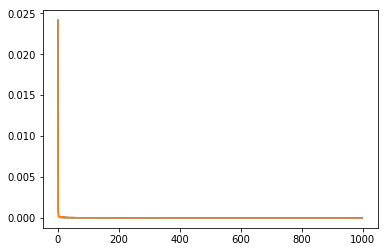

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['mean_squared_error'])
plt.show()

In [40]:
my_model = keras_model_fun(params)
my_model.compile(optimizer = params['optimizer'],
                 loss = params['loss'],
                 metrics = params['metrics'])
my_model.load_weights(my_dir + 'train_with_callbacks/ckpt')

In [55]:
os.mkdir(my_dir + 'test_model2')
my_model.save(filepath = my_dir + 'test_model2/test_model')

In [42]:
model  =  keras.models.load_model(my_dir + 'test_model')

In [48]:
my_model.get_weights()

[array([[ 5.3501878e-02, -3.8291290e-01, -1.3873402e-04,  2.3711506e-02,
         -5.6793118e-01, -3.7288409e-01, -4.4723815e-01,  3.0313849e-02,
         -4.2380476e-01,  1.5921164e-01,  4.1881356e-01,  2.7000260e-01,
          5.3909600e-01,  2.4060175e-02,  5.6342459e-01, -3.5284624e-01,
         -3.2442370e-01, -4.2525742e-02,  1.8000557e-01,  4.1187021e-05],
        [-8.8643292e-03,  2.5059929e-01, -9.2452914e-02, -1.2087687e-01,
          5.1967257e-01,  2.8264743e-01, -7.8053361e-01, -2.4981338e-01,
          3.2317790e-01,  2.8609073e-01, -7.5223631e-01,  1.6052245e-01,
          3.7155911e-01, -5.9382163e-02,  2.8766555e-01,  2.1582919e-01,
         -3.3368656e-01, -2.4818176e-01, -5.8487844e-02,  4.3979704e-01],
        [-1.2427950e-01, -6.9166034e-01,  1.8783206e-01, -1.3588461e-01,
          3.7705887e-02, -4.9139354e-01, -2.9214360e-02, -3.5200912e-01,
         -8.4036559e-01, -2.2542517e-01, -8.9981571e-02,  3.8217396e-01,
         -1.8241107e-01,  1.8269810e-01, -6.19101